In [3]:
import seaborn as sns  
import matplotlib.pyplot as plt  
import pandas as pd 
from tqdm import tqdm  
import os 
import statsmodels.api as sm  
import numpy as np

## 只读取病人的信息

In [13]:
dfasd = pd.read_csv('/home2/zhenglijing/work/bigwig/276depth>=10.csv')

In [14]:
dfasd=dfasd[dfasd['type']=="ASD"]

In [15]:
path='/home2/zhenglijing/work_0511/sub.csv'
df=pd.read_csv(path)
normal_numbers = df[df['type'] == 'normal']['number'].tolist()
dfasd=dfasd[~dfasd['number'].isin(normal_numbers)]

In [16]:
dfasd[dfasd['number']=='ERR3366542']
dfasd[dfasd['number']=='ERR3366532']

,Unnamed: 0,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,...,EUR.sites.2015_08,EAS.sites.2015_08,p_value,vaf,typeA,age,number,type,combine,depth


In [17]:
dfasd=dfasd[dfasd['vaf']>0.1]

In [18]:
dfasd

,Unnamed: 0,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,...,EUR.sites.2015_08,EAS.sites.2015_08,p_value,vaf,typeA,age,number,type,combine,depth
1,1,chr1,664468,664468,G,T,ncRNA_exonic,LOC100133331,.,.,...,.,0,9.105206e-04,0.160000,ASD_B26,5.0,CM202304250141,ASD,chr1-664468-664468-G-T-LOC100133331,57.0
5,5,chr1,12940016,12940016,C,A,intronic,PRAMEF4,.,.,...,.,0,9.761673e-10,0.126984,ASD_B26,5.0,CM202304250141,ASD,chr1-12940016-12940016-C-A-PRAMEF4,73.0
7,7,chr1,16908275,16908275,T,G,intronic,NBPF1,.,.,...,.,0,1.941575e-06,0.111111,ASD_B26,5.0,CM202304250141,ASD,chr1-16908275-16908275-T-G-NBPF1,40.0
8,8,chr1,16918255,16918255,A,C,intronic,NBPF1,.,.,...,.,0,3.101450e-09,0.195652,ASD_B26,5.0,CM202304250141,ASD,chr1-16918255-16918255-A-C-NBPF1,135.0
9,9,chr1,16969246,16969246,G,A,intergenic,CROCCP2,dist=11845;dist=2823,.,...,.,0,1.241628e-06,0.186441,ASD_B26,5.0,CM202304250141,ASD,chr1-16969246-16969246-G-A-CROCCP2,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23997,52693,chr17,16624049,16624049,T,C,intronic,CCDC144A,.,.,...,.,0,3.175275e-12,0.144444,NaN,8.0,SRR27849765,ASD,chr17-16624049-16624049-T-C-CCDC144A,110.0
23999,52695,chr20,62959184,62959184,T,C,intergenic,LINC00266-1,dist=24477;dist=NONE,.,...,.,0,1.214671e-05,0.216667,NaN,8.0,SRR27849765,ASD,chr20-62959184-62959184-T-C-LINC00266-1,71.0
24000,52696,chr20,62959184,62959184,T,C,intergenic,NONE,dist=24477;dist=NONE,.,...,.,0,1.214671e-05,0.216667,NaN,8.0,SRR27849765,ASD,chr20-62959184-62959184-T-C-NONE,71.0
24001,52701,chr22,24323303,24323303,G,A,intronic,GSTT2,.,.,...,.,0,2.828878e-06,0.142857,NaN,8.0,SRR27849765,ASD,chr22-24323303-24323303-G-A-GSTT2,44.0


In [22]:
listcombine=dfasd['combine'].unique().tolist()

## 读取病人和普通人的信息

In [25]:
path='/home2/zhenglijing/work/bigwig/276depth>=10.csv'
dfall=pd.read_csv(path,index_col=0)
dfall

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,EUR.sites.2015_08,EAS.sites.2015_08,p_value,vaf,typeA,age,number,type,combine,depth
0,chr1,14815,14815,C,T,ncRNA_exonic,WASH7P,.,.,.,...,.,0,5.653146e-08,0.095238,ASD_B26,5.0,CM202304250141,ASD,chr1-14815-14815-C-T-WASH7P,56.0
1,chr1,664468,664468,G,T,ncRNA_exonic,LOC100133331,.,.,.,...,.,0,9.105206e-04,0.160000,ASD_B26,5.0,CM202304250141,ASD,chr1-664468-664468-G-T-LOC100133331,57.0
2,chr1,12907620,12907620,A,G,exonic,HNRNPCL1,.,synonymous SNV,"HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...",...,.,0,1.378210e-63,0.024194,ASD_B26,5.0,CM202304250141,ASD,chr1-12907620-12907620-A-G-HNRNPCL1,244.0
3,chr1,12907620,12907620,A,G,exonic,HNRNPCL3,.,synonymous SNV,"HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...",...,.,0,1.378210e-63,0.024194,ASD_B26,5.0,CM202304250141,ASD,chr1-12907620-12907620-A-G-HNRNPCL3,244.0
4,chr1,12907620,12907620,A,G,exonic,HNRNPCL4,.,synonymous SNV,"HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...",...,.,0,1.378210e-63,0.024194,ASD_B26,5.0,CM202304250141,ASD,chr1-12907620-12907620-A-G-HNRNPCL4,244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52845,chr17,36453192,36453192,T,G,exonic,MRPL45,.,nonsynonymous SNV,"MRPL45:NM_001278279:exon1:c.T43G:p.F15V,MRPL45...",...,.,0,3.211480e-16,0.104167,TD_078,5.0,CM202304270035,TD,chr17-36453192-36453192-T-G-MRPL45,93.0
52846,chr18,14221254,14221254,A,T,ncRNA_intronic,ANKRD20A5P,.,.,.,...,.,0,5.782725e-19,0.065934,TD_078,5.0,CM202304270035,TD,chr18-14221254-14221254-A-T-ANKRD20A5P,97.0
52850,chr22,16909752,16909752,G,T,intergenic,OR11H1,dist=459948;dist=161889,.,.,...,.,0,1.332131e-13,0.084507,TD_078,5.0,CM202304270035,TD,chr22-16909752-16909752-G-T-OR11H1,85.0
52851,chr22,16909752,16909752,G,T,intergenic,CCT8L2,dist=459948;dist=161889,.,.,...,.,0,1.332131e-13,0.084507,TD_078,5.0,CM202304270035,TD,chr22-16909752-16909752-G-T-CCT8L2,85.0


In [26]:
dfall=dfall[~dfall['number'].isin(normal_numbers)]

In [27]:
len(dfall['number'].unique())

276

In [28]:
dfall

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,EUR.sites.2015_08,EAS.sites.2015_08,p_value,vaf,typeA,age,number,type,combine,depth
0,chr1,14815,14815,C,T,ncRNA_exonic,WASH7P,.,.,.,...,.,0,5.653146e-08,0.095238,ASD_B26,5.0,CM202304250141,ASD,chr1-14815-14815-C-T-WASH7P,56.0
1,chr1,664468,664468,G,T,ncRNA_exonic,LOC100133331,.,.,.,...,.,0,9.105206e-04,0.160000,ASD_B26,5.0,CM202304250141,ASD,chr1-664468-664468-G-T-LOC100133331,57.0
2,chr1,12907620,12907620,A,G,exonic,HNRNPCL1,.,synonymous SNV,"HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...",...,.,0,1.378210e-63,0.024194,ASD_B26,5.0,CM202304250141,ASD,chr1-12907620-12907620-A-G-HNRNPCL1,244.0
3,chr1,12907620,12907620,A,G,exonic,HNRNPCL3,.,synonymous SNV,"HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...",...,.,0,1.378210e-63,0.024194,ASD_B26,5.0,CM202304250141,ASD,chr1-12907620-12907620-A-G-HNRNPCL3,244.0
4,chr1,12907620,12907620,A,G,exonic,HNRNPCL4,.,synonymous SNV,"HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...",...,.,0,1.378210e-63,0.024194,ASD_B26,5.0,CM202304250141,ASD,chr1-12907620-12907620-A-G-HNRNPCL4,244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52845,chr17,36453192,36453192,T,G,exonic,MRPL45,.,nonsynonymous SNV,"MRPL45:NM_001278279:exon1:c.T43G:p.F15V,MRPL45...",...,.,0,3.211480e-16,0.104167,TD_078,5.0,CM202304270035,TD,chr17-36453192-36453192-T-G-MRPL45,93.0
52846,chr18,14221254,14221254,A,T,ncRNA_intronic,ANKRD20A5P,.,.,.,...,.,0,5.782725e-19,0.065934,TD_078,5.0,CM202304270035,TD,chr18-14221254-14221254-A-T-ANKRD20A5P,97.0
52850,chr22,16909752,16909752,G,T,intergenic,OR11H1,dist=459948;dist=161889,.,.,...,.,0,1.332131e-13,0.084507,TD_078,5.0,CM202304270035,TD,chr22-16909752-16909752-G-T-OR11H1,85.0
52851,chr22,16909752,16909752,G,T,intergenic,CCT8L2,dist=459948;dist=161889,.,.,...,.,0,1.332131e-13,0.084507,TD_078,5.0,CM202304270035,TD,chr22-16909752-16909752-G-T-CCT8L2,85.0


In [29]:
csv_file_path = '/home2/zhenglijing/work/bigwig/allcount276.csv'
dfcount=pd.read_csv(csv_file_path,index_col=0)
dfcount=dfcount.set_index('geneloci')
dfcount

,ASDcount,TDcount
geneloci,,
chr1-104116413-104116413-T-C-AMY2B,166,52
chr1-10425235-10425235-C-T-KIF1B,209,52
chr1-104297224-104297224-C-G-AMY1A,171,52
chr1-104297224-104297224-C-G-AMY1B,171,52
chr1-104297224-104297224-C-G-AMY1C,171,52
...,...,...
chrY-58883692-58883692-A-C-SPRY3,88,19
chrY-58905297-58905297-A-T-NONE,138,31
chrY-58905297-58905297-A-T-SPRY3,138,31


In [30]:
gene_counts_dict={}
for gene in tqdm(listcombine):
    ASDcount=dfcount.loc[gene,'ASDcount']
    TDcount=dfcount.loc[gene,'TDcount']    
    dftest=dfall[dfall['combine']==gene]
    TDmut=len(dftest[dftest['type']=="TD"])
    ASDmut=len(dftest[dftest['type']=="ASD"])
    df4= pd.DataFrame([[TDcount-TDmut,ASDcount-ASDmut],
                     [TDmut,ASDmut]
                     ],columns=['TD','ASD'],index=['non','mut'])
    gene_counts_dict[gene]=df4

100%|██████████| 2487/2487 [00:07<00:00, 352.75it/s]


### logit

In [31]:
df_dict={}
for gene_name, table in tqdm(list(gene_counts_dict.items())):
    dfls=[]
    nonTD=table.loc['non','TD']
    for i in  range(nonTD):
        dfls.append([0,0])
    nonASD=table.loc['non','ASD']
    for i in  range(nonASD):
        dfls.append([0,1])
    mutTD=table.loc['mut','TD']    
    for i in  range(mutTD):
        dfls.append([1,0])
    mutASD=table.loc['mut','ASD']
    for i in  range(mutASD):
        dfls.append([1,1])
    dfsub=pd.DataFrame(dfls,columns=['X','y'])
    df_dict[gene_name]=dfsub

100%|██████████| 2487/2487 [00:01<00:00, 1632.72it/s]


In [32]:
np.array(value['X']).reshape(-1, 1)

NameError: name 'value' is not defined

In [33]:

import numpy as np  
import pandas as pd  
import statsmodels.api as sm  
from tqdm import tqdm  
from sklearn.preprocessing import StandardScaler

listresult = []  
faills=[]
for key,value in tqdm(list(df_dict.items())):  
    try:  
        X = np.array(value['X']).reshape(-1, 1)
        scaler = StandardScaler()  
        features = X
        features_scaled = scaler.fit_transform(X)  
        model = sm.Logit(value['y'], X).fit(maxiter=10000)  

        coef = model.params.iloc[0] 
        OR_values = np.exp(coef) 
        pvalues = model.pvalues  .iloc[0]
        conf_int = model.conf_int(alpha=0.05)
        conf_int_lower = np.exp(conf_int.iloc[0,0])#.iloc)  
        conf_int_upper = np.exp(conf_int.iloc[0,1])#.iloc)  

        listresult.append([key, OR_values, pvalues, conf_int_lower, conf_int_upper])  
    except Exception as e:  
        print(f"{gene} failed with error: {e}")  
        faills.append([key,value])



  0%|          | 11/2487 [00:00<00:22, 108.52it/s]

Optimization terminated successfully.
         Current function value: 0.611483
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.682672
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.684578
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587984
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.611039
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.611039
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624240
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.690011
  

  2%|▏         | 38/2487 [00:00<00:26, 93.51it/s] 

Optimization terminated successfully.
         Current function value: 0.690617
         Iterations 335
chr16-46391413-46391413-T-C-ANKRD26P1 failed with error: Singular matrix
Optimization terminated successfully.
         Current function value: 0.579987
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579987
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579987
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.688696
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1
Optimization terminated successfully.
         Current function value: 0.690929
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677795
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690328
         Iterations 4
Optimiz

  3%|▎         | 85/2487 [00:00<00:14, 167.34it/s]

Optimization terminated successfully.
         Current function value: 0.617287
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.690483
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692684
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.685471
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.685471
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692491
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692491
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.681699
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.681699
  

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp
  5%|▌         | 125/2487 [00:02<01:10, 33.35it/s]

         Current function value: 0.687689
         Iterations: 10000
Optimization terminated successfully.
         Current function value: 0.663689
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.663689
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.676557
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.691548
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692404
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.635312
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.633006
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.655097
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.675536
         Iterations 6
Optimization 

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp
  5%|▌         | 131/2487 [00:04<01:29, 26.25it/s]


KeyboardInterrupt: 

In [326]:
dfbefore=pd.DataFrame(listresult)
dfbefore

,0,1,2,3,4
0,chr1-664468-664468-G-T-LOC100133331,4.500000e+00,2.442487e-06,2.407454,8.411375
1,chr1-12940016-12940016-C-A-PRAMEF4,4.000000e+00,7.950952e-02,0.849427,18.836226
2,chr1-16908275-16908275-T-G-NBPF1,2.500000e+00,1.214264e-01,0.784084,7.971089
3,chr1-16918255-16918255-A-C-NBPF1,3.800000e+00,2.865394e-09,2.445964,5.903604
4,chr1-16969246-16969246-G-A-CROCCP2,3.156250e+00,1.461844e-08,2.120797,4.697250
...,...,...,...,...,...
1623,chr12-64216816-64216816-A-C-RXYLT1-AS1,5.250000e+00,2.369065e-03,1.802149,15.294237
1624,chr17-21905071-21905071-T-G-FLJ36000,1.000000e+00,1.000000e+00,0.062549,15.987508
1625,chr1-243289588-243289588-T-C-CEP170,6.696973e+12,9.999909e-01,0.000000,inf
1626,chr14-106066660-106066660-C-T-LOC105370697,6.119515e+11,9.999609e-01,0.000000,inf


In [327]:
dfbefore.columns = ['geneloci', 'OR','p','LCI','HCI',]

In [328]:
gene_counts_dict

{'chr1-664468-664468-G-T-LOC100133331':      TD  ASD
 non  40   71
 mut  12   54,
 'chr1-12940016-12940016-C-A-PRAMEF4':      TD  ASD
 non  50  124
 mut   2    8,
 'chr1-16908275-16908275-T-G-NBPF1':      TD  ASD
 non  48   93
 mut   4   10,
 'chr1-16918255-16918255-A-C-NBPF1':      TD  ASD
 non  27   60
 mut  25   95,
 'chr1-16969246-16969246-G-A-CROCCP2':      TD  ASD
 non  20   76
 mut  32  101,
 'chr1-16969246-16969246-G-A-MST1P2':      TD  ASD
 non  20   76
 mut  32  101,
 'chr1-16973606-16973606-G-T-MST1P2':      TD  ASD
 non   6   76
 mut  46  120,
 'chr1-17012152-17012152-G-A-MIR3675':      TD  ASD
 non  50  158
 mut   2    2,
 'chr1-17012152-17012152-G-A-ESPNP':      TD  ASD
 non  50  158
 mut   2    2,
 'chr1-17183272-17183272-C-T-MST1L':      TD  ASD
 non  52  168
 mut   0    1,
 'chr1-17183272-17183272-C-T-MIR3675':      TD  ASD
 non  52  168
 mut   0    1,
 'chr1-106435311-106435311-C-T-LINC01676':      TD  ASD
 non  51  195
 mut   1    5,
 'chr1-106435311-106435311-C-T-LI

In [329]:
dfbefore

,geneloci,OR,p,LCI,HCI
0,chr1-664468-664468-G-T-LOC100133331,4.500000e+00,2.442487e-06,2.407454,8.411375
1,chr1-12940016-12940016-C-A-PRAMEF4,4.000000e+00,7.950952e-02,0.849427,18.836226
2,chr1-16908275-16908275-T-G-NBPF1,2.500000e+00,1.214264e-01,0.784084,7.971089
3,chr1-16918255-16918255-A-C-NBPF1,3.800000e+00,2.865394e-09,2.445964,5.903604
4,chr1-16969246-16969246-G-A-CROCCP2,3.156250e+00,1.461844e-08,2.120797,4.697250
...,...,...,...,...,...
1623,chr12-64216816-64216816-A-C-RXYLT1-AS1,5.250000e+00,2.369065e-03,1.802149,15.294237
1624,chr17-21905071-21905071-T-G-FLJ36000,1.000000e+00,1.000000e+00,0.062549,15.987508
1625,chr1-243289588-243289588-T-C-CEP170,6.696973e+12,9.999909e-01,0.000000,inf
1626,chr14-106066660-106066660-C-T-LOC105370697,6.119515e+11,9.999609e-01,0.000000,inf


In [34]:
dfbefore=pd.read_csv('beforefilterp+conut.csv')

In [35]:
gene_counts_dict['chr7-151970695-151970695-A-T-KMT2C']

,TD,ASD
non,51,153
mut,1,12


In [36]:
counts.loc['non']['TD']

NameError: name 'counts' is not defined

In [37]:
for index, row in dfbefore.iterrows():
    geneloci = row['geneloci']
    if geneloci in gene_counts_dict.keys():
        counts = gene_counts_dict[geneloci]
        dfbefore.at[index, 'TD_non'] = counts.loc['non']['TD']
        dfbefore.at[index, 'TD_mut'] = counts.loc['mut']['TD']
        dfbefore.at[index, 'ASD_non'] = counts.loc['non']['ASD']
        dfbefore.at[index, 'ASD_mut'] = counts.loc['mut']['ASD']

In [38]:
dfbefore

,Unnamed: 0,geneloci,OR,p,LCI,HCI,TD_non,TD_mut,ASD_non,ASD_mut
0,0,chr1-664468-664468-G-T-LOC100133331,4.500000e+00,2.442487e-06,2.407454,8.411375,40.0,12.0,71.0,54.0
1,1,chr1-12940016-12940016-C-A-PRAMEF4,4.000000e+00,7.950952e-02,0.849427,18.836226,50.0,2.0,124.0,8.0
2,2,chr1-16908275-16908275-T-G-NBPF1,2.500000e+00,1.214264e-01,0.784084,7.971089,48.0,4.0,93.0,10.0
3,3,chr1-16918255-16918255-A-C-NBPF1,3.800000e+00,2.865394e-09,2.445964,5.903604,27.0,25.0,60.0,95.0
4,4,chr1-16969246-16969246-G-A-CROCCP2,3.156250e+00,1.461844e-08,2.120797,4.697250,20.0,32.0,76.0,101.0
...,...,...,...,...,...,...,...,...,...,...
1623,1623,chr12-64216816-64216816-A-C-RXYLT1-AS1,5.250000e+00,2.369065e-03,1.802149,15.294237,21.0,4.0,55.0,21.0
1624,1624,chr17-21905071-21905071-T-G-FLJ36000,1.000000e+00,1.000000e+00,0.062549,15.987508,20.0,1.0,79.0,1.0
1625,1625,chr1-243289588-243289588-T-C-CEP170,6.696973e+12,9.999909e-01,0.000000,inf,52.0,0.0,136.0,1.0
1626,1626,chr14-106066660-106066660-C-T-LOC105370697,6.119515e+11,9.999609e-01,0.000000,inf,29.0,0.0,94.0,2.0


## 多重FDR

In [10]:
pip install statsmodels numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
from statsmodels.stats.multitest import multipletests

p_values = dfbefore['p'].values
rejected_fdr, p_fdr_corrected, _, _ = multipletests(
    p_values, 
    alpha=0.05, 
    method='fdr_bh')

dfbefore['p_fdr'] = p_fdr_corrected
dfbefore['significant_fdr'] = rejected_fdr

significant_results = dfbefore[dfbefore['p_fdr'] < 0.05]

print(f"原始p值数量: {len(p_values)}")
print(f"FDR校正后显著结果数量: {sum(rejected_fdr)}")
print("显著结果示例:")
print(significant_results[['geneloci', 'p', 'p_fdr', 'OR']].head())

原始p值数量: 1628
FDR校正后显著结果数量: 93
显著结果示例:
                              geneloci             p         p_fdr        OR
0  chr1-664468-664468-G-T-LOC100133331  2.442487e-06  2.340257e-04  4.500000
3     chr1-16918255-16918255-A-C-NBPF1  2.865394e-09  9.329724e-07  3.800000
4   chr1-16969246-16969246-G-A-CROCCP2  1.461844e-08  3.399831e-06  3.156250
5    chr1-16969246-16969246-G-A-MST1P2  1.461844e-08  3.399831e-06  3.156250
6    chr1-16973606-16973606-G-T-MST1P2  3.216005e-08  6.544570e-06  2.608696


In [12]:
significant_results

,Unnamed: 0,geneloci,OR,p,LCI,HCI,TD_non,TD_mut,ASD_non,ASD_mut,p_fdr,significant_fdr
0,0,chr1-664468-664468-G-T-LOC100133331,4.500000,2.442487e-06,2.407454,8.411375,40.0,12.0,71.0,54.0,2.340257e-04,True
3,3,chr1-16918255-16918255-A-C-NBPF1,3.800000,2.865394e-09,2.445964,5.903604,27.0,25.0,60.0,95.0,9.329724e-07,True
4,4,chr1-16969246-16969246-G-A-CROCCP2,3.156250,1.461844e-08,2.120797,4.697250,20.0,32.0,76.0,101.0,3.399831e-06,True
5,5,chr1-16969246-16969246-G-A-MST1P2,3.156250,1.461844e-08,2.120797,4.697250,20.0,32.0,76.0,101.0,3.399831e-06,True
6,6,chr1-16973606-16973606-G-T-MST1P2,2.608696,3.216005e-08,1.857005,3.664661,6.0,46.0,76.0,120.0,6.544570e-06,True
...,...,...,...,...,...,...,...,...,...,...,...,...
864,864,chrX-73811695-73811695-A-G-RLIM,23.000000,2.144343e-03,3.106124,170.308719,51.0,1.0,193.0,23.0,3.836254e-02,True
952,952,chr1-16948753-16948753-G-A-CROCCP2,4.600000,1.983318e-03,1.748820,12.099589,23.0,5.0,82.0,23.0,3.587603e-02,True
1093,1093,chr1-148024903-148024903-C-T-LOC100996740,3.666667,5.501422e-04,1.754593,7.662428,43.0,9.0,99.0,33.0,1.468248e-02,True
1622,1622,chr12-64216816-64216816-A-C-MIR10527,5.250000,2.369065e-03,1.802149,15.294237,21.0,4.0,55.0,21.0,4.147137e-02,True


In [13]:
significant_results[significant_results['OR']>1]

,Unnamed: 0,geneloci,OR,p,LCI,HCI,TD_non,TD_mut,ASD_non,ASD_mut,p_fdr,significant_fdr
0,0,chr1-664468-664468-G-T-LOC100133331,4.500000,2.442487e-06,2.407454,8.411375,40.0,12.0,71.0,54.0,2.340257e-04,True
3,3,chr1-16918255-16918255-A-C-NBPF1,3.800000,2.865394e-09,2.445964,5.903604,27.0,25.0,60.0,95.0,9.329724e-07,True
4,4,chr1-16969246-16969246-G-A-CROCCP2,3.156250,1.461844e-08,2.120797,4.697250,20.0,32.0,76.0,101.0,3.399831e-06,True
5,5,chr1-16969246-16969246-G-A-MST1P2,3.156250,1.461844e-08,2.120797,4.697250,20.0,32.0,76.0,101.0,3.399831e-06,True
6,6,chr1-16973606-16973606-G-T-MST1P2,2.608696,3.216005e-08,1.857005,3.664661,6.0,46.0,76.0,120.0,6.544570e-06,True
...,...,...,...,...,...,...,...,...,...,...,...,...
864,864,chrX-73811695-73811695-A-G-RLIM,23.000000,2.144343e-03,3.106124,170.308719,51.0,1.0,193.0,23.0,3.836254e-02,True
952,952,chr1-16948753-16948753-G-A-CROCCP2,4.600000,1.983318e-03,1.748820,12.099589,23.0,5.0,82.0,23.0,3.587603e-02,True
1093,1093,chr1-148024903-148024903-C-T-LOC100996740,3.666667,5.501422e-04,1.754593,7.662428,43.0,9.0,99.0,33.0,1.468248e-02,True
1622,1622,chr12-64216816-64216816-A-C-MIR10527,5.250000,2.369065e-03,1.802149,15.294237,21.0,4.0,55.0,21.0,4.147137e-02,True


In [39]:
result_adjusted = {}
  
for i in listresult:  
    if (i[2] < 0.05)&(i[1] > 1): 
        result_adjusted[i[0]]=[i[1],i[3],i[4]]
  


In [40]:
result_adjusted_df=pd.DataFrame(columns=['OR','LCI','HCI'])
for key in result_adjusted.keys():
    result_adjusted_df.loc[key]=result_adjusted[key]

In [42]:
result_adjusted_df.sort_values("OR",ascending=False)

,OR,LCI,HCI
chr1-16891963-16891963-T-A-NBPF1,13.000000,3.085547,54.771486
chr7-151970695-151970695-A-T-KMT2C,12.000000,1.560352,92.286867
chr1-206567084-206567084-C-T-SRGAP2D,6.500000,1.466829,28.803638
chr17-62952732-62952732-C-A-LRRC37A3,6.500000,1.466829,28.803638
chr17-62952732-62952732-C-A-AMZ2P1,6.500000,1.466829,28.803638
...,...,...,...
chr16-21747871-21747871-T-G-OTOA,1.882353,1.045289,3.389736
chr16-21747881-21747881-G-A-OTOA,1.875000,1.022104,3.439596
chr1-148891790-148891790-T-A-LOC101927429,1.727273,1.021702,2.920100
chr1-148891790-148891790-T-A-NBPF25P,1.727273,1.021702,2.920100


In [4]:
result_adjusted_df=pd.read_csv('Allchip_ORmodif_vaf>0.1.csv',index_col=0)

In [5]:
result_adjusted_df

,OR,LCI,HCI,index,gene2_formatted
chr1-664468-664468-G-T-LOC100133331,4.500000,2.407454,8.411375,chr1-664468-664468-G-T-LOC100133331,chr1:g.664468G>T
chr1-16918255-16918255-A-C-NBPF1,3.800000,2.445964,5.903604,chr1-16918255-16918255-A-C-NBPF1,chr1:g.16918255A>C
chr1-16969246-16969246-G-A-CROCCP2,3.156250,2.120797,4.697250,chr1-16969246-16969246-G-A-CROCCP2,chr1:g.16969246G>A
chr1-16969246-16969246-G-A-MST1P2,3.156250,2.120797,4.697250,chr1-16969246-16969246-G-A-MST1P2,chr1:g.16969246G>A
chr1-16973606-16973606-G-T-MST1P2,2.608696,1.857005,3.664661,chr1-16973606-16973606-G-T-MST1P2,chr1:g.16973606G>T
...,...,...,...,...,...
chr2-107042610-107042610-G-T-RGPD3,9.000000,1.140243,71.037508,chr2-107042610-107042610-G-T-RGPD3,chr2:g.107042610G>T
chrY-16952347-16952347-T-C-NLGN4Y,8.000000,1.000586,63.962519,chrY-16952347-16952347-T-C-NLGN4Y,chrY:g.16952347T>C
chr1-152284377-152284377-G-A-FLG,16.000000,2.121883,120.647534,chr1-152284377-152284377-G-A-FLG,chr1:g.152284377G>A
chr12-64216816-64216816-A-C-MIR10527,5.250000,1.802149,15.294237,chr12-64216816-64216816-A-C-MIR10527,chr12:g.64216816A>C


In [44]:
result_adjusted_df['index']=result_adjusted_df.index
def format_gene2(row):
    parts = row.split('-')    chrom = parts[0]    pos = parts[1]    ref = parts[3]    alt = parts[4]    return f"{chrom}:g.{pos}{ref}>{alt}"
result_adjusted_df['gene2_formatted'] = result_adjusted_df['index'].apply(format_gene2)

result_adjusted_df

,OR,LCI,HCI,index,gene2_formatted
chr1-664468-664468-G-T-LOC100133331,4.500000,2.407454,8.411375,chr1-664468-664468-G-T-LOC100133331,chr1:g.664468G>T
chr1-16918255-16918255-A-C-NBPF1,3.800000,2.445964,5.903604,chr1-16918255-16918255-A-C-NBPF1,chr1:g.16918255A>C
chr1-16969246-16969246-G-A-CROCCP2,3.156250,2.120797,4.697250,chr1-16969246-16969246-G-A-CROCCP2,chr1:g.16969246G>A
chr1-16969246-16969246-G-A-MST1P2,3.156250,2.120797,4.697250,chr1-16969246-16969246-G-A-MST1P2,chr1:g.16969246G>A
chr1-16973606-16973606-G-T-MST1P2,2.608696,1.857005,3.664661,chr1-16973606-16973606-G-T-MST1P2,chr1:g.16973606G>T
...,...,...,...,...,...
chr2-107042610-107042610-G-T-RGPD3,9.000000,1.140243,71.037508,chr2-107042610-107042610-G-T-RGPD3,chr2:g.107042610G>T
chrY-16952347-16952347-T-C-NLGN4Y,8.000000,1.000586,63.962519,chrY-16952347-16952347-T-C-NLGN4Y,chrY:g.16952347T>C
chr1-152284377-152284377-G-A-FLG,16.000000,2.121883,120.647534,chr1-152284377-152284377-G-A-FLG,chr1:g.152284377G>A
chr12-64216816-64216816-A-C-MIR10527,5.250000,1.802149,15.294237,chr12-64216816-64216816-A-C-MIR10527,chr12:g.64216816A>C


In [45]:
result_adjusted_df

,OR,LCI,HCI,index,gene2_formatted
chr1-664468-664468-G-T-LOC100133331,4.500000,2.407454,8.411375,chr1-664468-664468-G-T-LOC100133331,chr1:g.664468G>T
chr1-16918255-16918255-A-C-NBPF1,3.800000,2.445964,5.903604,chr1-16918255-16918255-A-C-NBPF1,chr1:g.16918255A>C
chr1-16969246-16969246-G-A-CROCCP2,3.156250,2.120797,4.697250,chr1-16969246-16969246-G-A-CROCCP2,chr1:g.16969246G>A
chr1-16969246-16969246-G-A-MST1P2,3.156250,2.120797,4.697250,chr1-16969246-16969246-G-A-MST1P2,chr1:g.16969246G>A
chr1-16973606-16973606-G-T-MST1P2,2.608696,1.857005,3.664661,chr1-16973606-16973606-G-T-MST1P2,chr1:g.16973606G>T
...,...,...,...,...,...
chr2-107042610-107042610-G-T-RGPD3,9.000000,1.140243,71.037508,chr2-107042610-107042610-G-T-RGPD3,chr2:g.107042610G>T
chrY-16952347-16952347-T-C-NLGN4Y,8.000000,1.000586,63.962519,chrY-16952347-16952347-T-C-NLGN4Y,chrY:g.16952347T>C
chr1-152284377-152284377-G-A-FLG,16.000000,2.121883,120.647534,chr1-152284377-152284377-G-A-FLG,chr1:g.152284377G>A
chr12-64216816-64216816-A-C-MIR10527,5.250000,1.802149,15.294237,chr12-64216816-64216816-A-C-MIR10527,chr12:g.64216816A>C


In [46]:
contains_hrnr = result_adjusted_df.index.str.contains("HRNR").any()

print("Index 中包含 'HRNR' 吗？", contains_hrnr)

Index 中包含 'HRNR' 吗？ False


In [6]:
genes = [
    "RETSAT",
    "RLIM",
    "FLG",
    "IQSEC3",
    "CEP120",
    "NBPF1",
    "TYRO3",
    "KMT2C",
    "GOLGA8B",
    "GOLGA8A",
    "GUSBP2",
    "PDXDC1",
    "CROCCP2",
    "OR2L13",
    "ANKRD36BP2",
    "DRD5P2",
    "TTN",
    "CCZ1",
    "OR11H12",
    "NLGN4Y",
    "MAP2K3",
    "PLEKHB2",
    "LNCRNA-ATB",
    "PCDHA6"
]

In [7]:
len(genes)

24

In [8]:
sel_index=[]
for ind in result_adjusted_df.index:
    for gene in genes:
        if gene in ind:
            sel_index.append(ind)

In [9]:
result_adjusted_df['gene']=result_adjusted_df['index'].str.split('-',expand=True)[5]

In [10]:
result_adjusted_df=result_adjusted_df[result_adjusted_df.index.isin(sel_index)].sort_values("OR",ascending=False).drop_duplicates('gene').iloc[:24]

In [11]:
result_adjusted_df

,OR,LCI,HCI,index,gene2_formatted,gene
chr2-85570186-85570186-G-A-RETSAT,24.0,3.246813,177.404723,chr2-85570186-85570186-G-A-RETSAT,chr2:g.85570186G>A,RETSAT
chrX-73811695-73811695-A-G-RLIM,23.0,3.106124,170.308719,chrX-73811695-73811695-A-G-RLIM,chrX:g.73811695A>G,RLIM
chr5-122737709-122737709-C-T-CEP120,21.0,5.083524,86.750851,chr5-122737709-122737709-C-T-CEP120,chr5:g.122737709C>T,CEP120
chr1-16945504-16945504-C-T-CROCCP2,20.0,2.684157,149.022562,chr1-16945504-16945504-C-T-CROCCP2,chr1:g.16945504C>T,CROCCP2
chr1-152284377-152284377-G-A-FLG,16.0,2.121883,120.647534,chr1-152284377-152284377-G-A-FLG,chr1:g.152284377G>A,FLG
chr12-92551-92551-C-G-IQSEC3,14.0,1.840987,106.464628,chr12-92551-92551-C-G-IQSEC3,chr12:g.92551C>G,IQSEC3
chr1-16891963-16891963-T-A-NBPF1,13.0,3.085547,54.771486,chr1-16891963-16891963-T-A-NBPF1,chr1:g.16891963T>A,NBPF1
chr15-41865525-41865525-G-T-TYRO3,13.0,1.700630,99.374954,chr15-41865525-41865525-G-T-TYRO3,chr15:g.41865525G>T,TYRO3
chr15-34813918-34813918-A-G-GOLGA8A,12.0,1.560352,92.286867,chr15-34813918-34813918-A-G-GOLGA8A,chr15:g.34813918A>G,GOLGA8A
chr15-34813918-34813918-A-G-GOLGA8B,12.0,1.560352,92.286867,chr15-34813918-34813918-A-G-GOLGA8B,chr15:g.34813918A>G,GOLGA8B


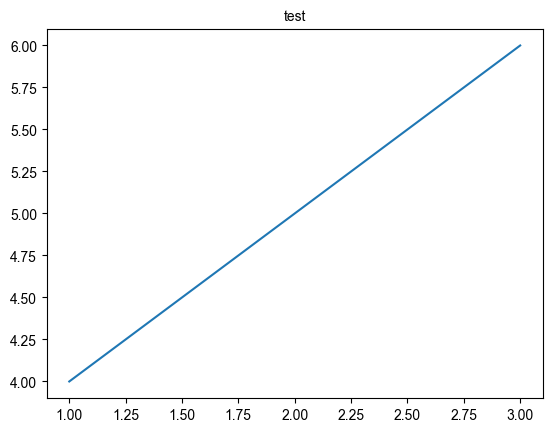

In [53]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = '/home2/zhenglijing/work/Arial.ttf'font = FontProperties(fname=font_path)

plt.plot([1, 2, 3], [4, 5, 6])
plt.title('test', fontproperties=font)
plt.show()

In [54]:
result_adjusted_df30log=result_adjusted_df.copy()
result_adjusted_df30log[['OR','LCI','HCI']]=np.log2(result_adjusted_df[['OR','LCI','HCI']])

In [55]:
result_adjusted_df30log

,OR,LCI,HCI,index,gene2_formatted,gene
chr2-85570186-85570186-G-A-RETSAT,4.584963,1.699024,7.470901,chr2-85570186-85570186-G-A-RETSAT,chr2:g.85570186G>A,RETSAT
chrX-73811695-73811695-A-G-RLIM,4.523562,1.635115,7.412008,chrX-73811695-73811695-A-G-RLIM,chrX:g.73811695A>G,RLIM
chr5-122737709-122737709-C-T-CEP120,4.392317,2.345829,6.438806,chr5-122737709-122737709-C-T-CEP120,chr5:g.122737709C>T,CEP120
chr1-16945504-16945504-C-T-CROCCP2,4.321928,1.424469,7.219387,chr1-16945504-16945504-C-T-CROCCP2,chr1:g.16945504C>T,CROCCP2
chr1-152284377-152284377-G-A-FLG,4.000000,1.085345,6.914655,chr1-152284377-152284377-G-A-FLG,chr1:g.152284377G>A,FLG
chr12-92551-92551-C-G-IQSEC3,3.807355,0.880479,6.734230,chr12-92551-92551-C-G-IQSEC3,chr12:g.92551C>G,IQSEC3
chr1-16891963-16891963-T-A-NBPF1,3.700440,1.625526,5.775353,chr1-16891963-16891963-T-A-NBPF1,chr1:g.16891963T>A,NBPF1
chr15-41865525-41865525-G-T-TYRO3,3.700440,0.766069,6.634810,chr15-41865525-41865525-G-T-TYRO3,chr15:g.41865525G>T,TYRO3
chr15-34813918-34813918-A-G-GOLGA8A,3.584963,0.641872,6.528053,chr15-34813918-34813918-A-G-GOLGA8A,chr15:g.34813918A>G,GOLGA8A
chr15-34813918-34813918-A-G-GOLGA8B,3.584963,0.641872,6.528053,chr15-34813918-34813918-A-G-GOLGA8B,chr15:g.34813918A>G,GOLGA8B


In [64]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

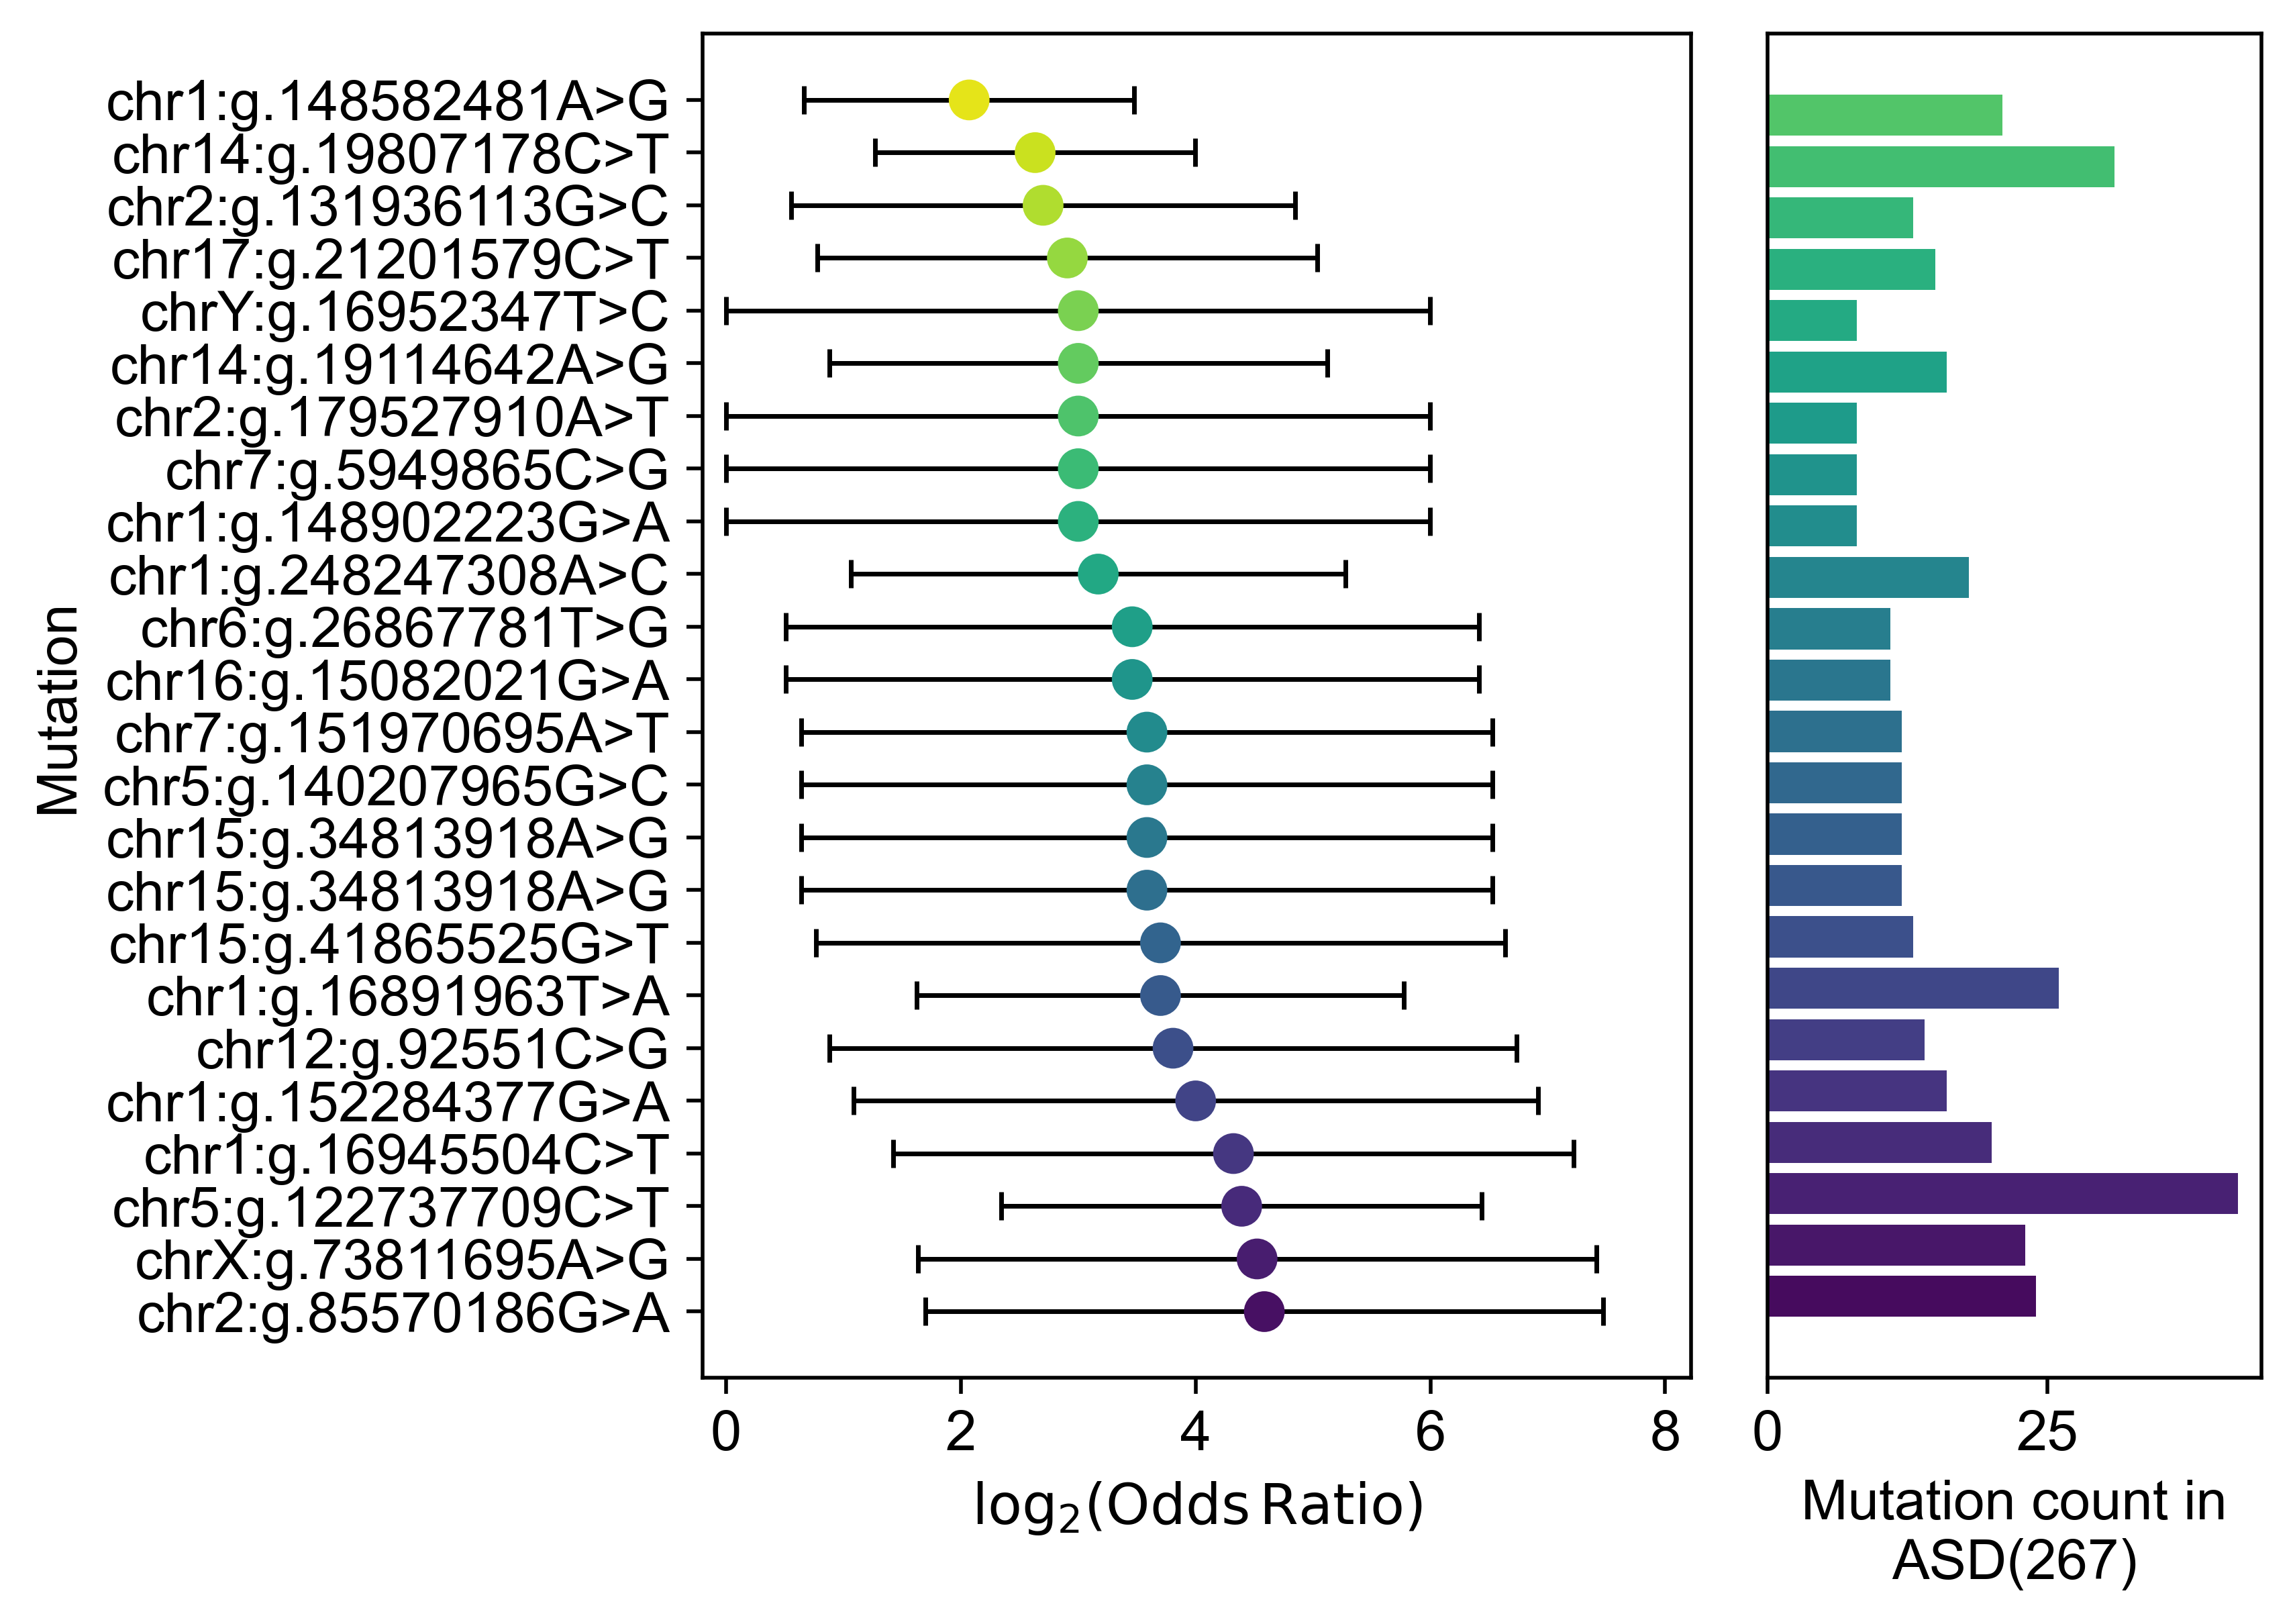

In [65]:
plt.rcParams['font.family'] = 'Arial'
labels = result_adjusted_df30log['gene2_formatted']
mut_asd=[gene_counts_dict[i].loc['mut','ASD'] for i in result_adjusted_df30log.index ]
ors = result_adjusted_df30log['OR']
ci_low = result_adjusted_df30log['LCI']
ci_high = result_adjusted_df30log['HCI']
plt.subplots(1,2,figsize=(7, 5),gridspec_kw={'width_ratios':[2,1]},dpi=500)
plt.subplot(1,2,1)
colors = sns.color_palette('viridis', len(ors))[::1]
plt.scatter(ors, range(len(ors)), c=colors, s=60, zorder=3)

for i in range(len(ors)):
    plt.plot([ci_low[i], ci_high[i]], [i, i], color='black', linewidth=.8)
    plt.plot([ors[i], ors[i]], [i-0.1, i+0.1], color='black', linewidth=.8)plt.errorbar(ors, range(len(ors)), xerr=[[ors[i]-ci_low[i] for i in range(len(ors))], [ci_high[i]-ors[i] for i in range(len(ors))]], fmt='none', ecolor='black', capsize=3, elinewidth=1)

plt.xlabel(r'$\log_2(\mathrm{Odds\,Ratio})$', fontsize=12, fontweight='bold')
plt.ylabel('Mutation')

plt.xlim(-0.2, max(ci_high) * 1.1)

plt.yticks(range(len(ors)), labels)
    
plt.subplot(1,2,2)
for i in range(len(ors)):
    plt.barh(y=i,width=mut_asd[i],color=sns.color_palette('viridis',32)[::1][i])
plt.xlabel(' Mutation count in \nASD(267)')
plt.yticks([])
plt.tight_layout()
plt.savefig('logit_forest.pdf')
plt.show()

In [57]:
data = [{'geneloci': key, 'OR': value} for key, value in result_adjusted.items()]
 
dfR = pd.DataFrame(data)
 
dfR

,geneloci,OR
0,chr1-664468-664468-G-T-LOC100133331,"[4.500000000000003, 2.4074542155903367, 8.4113..."
1,chr1-16918255-16918255-A-C-NBPF1,"[3.8000000000000003, 2.4459636998580625, 5.903..."
2,chr1-16969246-16969246-G-A-CROCCP2,"[3.1562499999999996, 2.1207972227348724, 4.697..."
3,chr1-16969246-16969246-G-A-MST1P2,"[3.1562499999999996, 2.1207972227348724, 4.697..."
4,chr1-16973606-16973606-G-T-MST1P2,"[2.6086956521739135, 1.857004821059042, 3.6646..."
...,...,...
57,chr1-206567165-206567165-T-A-SRGAP2D,"[2.433333333333333, 1.5907530691168879, 3.7222..."
58,chr1-248738133-248738133-A-G-OR2T34,"[3.4285714285714293, 1.4773012641381926, 7.957..."
59,chr2-91766609-91766609-G-A-NONE,"[3.0000000000000004, 1.8085976462735815, 4.976..."
60,chr2-91766609-91766609-G-A-LOC107985911,"[3.0000000000000004, 1.8085976462735815, 4.976..."


In [195]:
len(result_adjusted)

286

In [190]:
listresult[:2]

[['chr1-149648130-149648130-T-G-LINC00869',
  x1    1.151168
  dtype: float64,
  x1    0.474359
  dtype: float64,
  x1    0.78278
  Name: 0, dtype: float64,
  x1    1.692927
  Name: 1, dtype: float64],
 ['chr1-22333538-22333538-A-G-CELA3A',
  x1    1.051878
  dtype: float64,
  x1    0.702227
  dtype: float64,
  x1    0.811631
  Name: 0, dtype: float64,
  x1    1.36324
  Name: 1, dtype: float64]]

### fisher

In [196]:
gene_counts_dict


{'chr1-13418-13418-G-A-DDX11L1':      TD  ASD
 non  36  164
 mut  16   49,
 'chr1-13418-13418-G-A-LOC102725121':      TD  ASD
 non  36  164
 mut  16   49,
 'chr1-1581713-1581713-A-G-CDK11B':      TD  ASD
 non  38  121
 mut  14   32,
 'chr1-16363042-16363042-C-T-CLCNKA':      TD  ASD
 non  25   75
 mut  12   16,
 'chr1-16363042-16363042-C-T-CLCNKB':      TD  ASD
 non  25   75
 mut  12   16,
 'chr1-16892065-16892065-G-A-NBPF1':      TD  ASD
 non  47  159
 mut   5   12,
 'chr1-16918255-16918255-A-C-NBPF1':      TD  ASD
 non  27   60
 mut  25   95,
 'chr1-16973606-16973606-G-T-MST1P2':      TD  ASD
 non   6   76
 mut  46  120,
 'chr1-17185602-17185602-A-G-MIR3675':      TD  ASD
 non  44  141
 mut   8   22,
 'chr1-143743325-143743325-C-A-LINC01138':      TD  ASD
 non  46   80
 mut   6   39,
 'chr1-144863505-144863505-A-G-LOC100996724':      TD  ASD
 non  26   87
 mut  26   36,
 'chr1-144878899-144878899-C-G-LOC100996724':      TD  ASD
 non  44  103
 mut   8   13,
 'chr1-144994902-144994902-

In [197]:
gene_counts_dict['chr7-151970695-151970695-A-T-KMT2C']

,TD,ASD
non,51,153
mut,1,12


In [198]:
from scipy.stats import fisher_exact
import numpy as np

table = np.array([[53, 153], [1, 12]])

odds_ratio, p_value = fisher_exact(table, alternative='two-sided')
print(f"Odds Ratio: {odds_ratio:.4f}, p-value: {p_value:.4f}")

Odds Ratio: 4.1569, p-value: 0.1942


In [199]:
fisher_exact(gene_counts_dict['chr7-151970695-151970695-A-T-KMT2C'])

(4.0, 0.19775627422932893)

In [354]:
from scipy.stats import fisher_exact  
  
result_lists = []  
  
for gene_name, table in tqdm(gene_counts_dict.items()):  
    oddsratio, pvalue = fisher_exact(table)  
    if (pvalue<0.05) &(oddsratio>1):
        result_lists.append([gene_name,oddsratio,pvalue,table])
    
  


100%|██████████| 2487/2487 [00:02<00:00, 1166.51it/s]


In [201]:
result_lists

[['chr1-143743325-143743325-C-A-LINC01138',
  3.7375,
  0.004245408314828662,
       TD  ASD
  non  46   80
  mut   6   39],
 ['chr14-19807178-19807178-C-T-LINC01297-DUXAP10-NBEAP6',
  3.4974358974358974,
  0.020418850694576815,
       TD  ASD
  non  22   39
  mut   5   31],
 ['chr14-19807178-19807178-C-T-LNCRNA-ATB',
  3.4974358974358974,
  0.020418850694576815,
       TD  ASD
  non  22   39
  mut   5   31],
 ['chr1-664468-664468-G-T-LOC100133331',
  2.535211267605634,
  0.01639063976606523,
       TD  ASD
  non  40   71
  mut  12   54],
 ['chr1-16891963-16891963-T-A-NBPF1',
  4.887218045112782,
  0.018905831516674385,
       TD  ASD
  non  50  133
  mut   2   26],
 ['chr2-85570186-85570186-G-A-RETSAT',
  11.027027027027026,
  0.0031849383274602885,
       TD  ASD
  non  51  111
  mut   1   24],
 ['chr1-16976193-16976193-C-T-MST1P2',
  3.4317460317460315,
  0.00844744797589609,
       TD  ASD
  non  47  126
  mut   5   46],
 ['chr2-132292678-132292678-T-C-CCDC74A',
  6.798245614035087

In [355]:
dff = pd.DataFrame(result_lists, columns=["geneloci", "OR", "P", "table"])

In [356]:
dff

,geneloci,OR,P,table
0,chr1-664468-664468-G-T-LOC100133331,2.535211,0.016391,TD ASD non 40 71 mut 12 54
1,chr1-16891963-16891963-T-A-NBPF1,4.887218,0.018906,TD ASD non 50 133 mut 2 26
2,chr20-62959184-62959184-T-C-LINC00266-1,inf,0.003958,TD ASD non 29 86 mut 0 23
3,chr20-62959184-62959184-T-C-NONE,inf,0.003958,TD ASD non 29 86 mut 0 23
4,chr1-143743325-143743325-C-A-LINC01138,3.737500,0.004245,TD ASD non 46 80 mut 6 39
5,chr14-19807178-19807178-C-T-LINC01297-DUXAP10-...,3.497436,0.020419,TD ASD non 22 39 mut 5 31
6,chr14-19807178-19807178-C-T-LNCRNA-ATB,3.497436,0.020419,TD ASD non 22 39 mut 5 31
7,chr1-16976193-16976193-C-T-MST1P2,3.431746,0.008447,TD ASD non 47 126 mut 5 46
8,chr2-132292678-132292678-T-C-CCDC74A,6.798246,0.006406,TD ASD non 31 57 mut 2 25
9,chr2-132292678-132292678-T-C-POTEKP,6.798246,0.006406,TD ASD non 31 57 mut 2 25
